Name:- Rohit Mahadev Mane
Roll No:- CO337
Class:- TE Computer

Assignment No :- 5

Data Analytics II


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [2]:
df= pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Drop the column User ID**

In [6]:
df.drop(['User ID'],axis=1,inplace=True)

In [7]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [10]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

**Data Preprocessing**

In [11]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

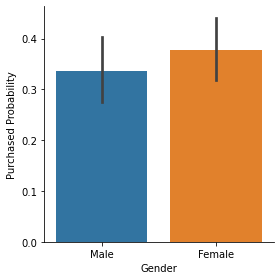

In [13]:
g = sns.catplot(x = "Gender",y = "Purchased",data = df,kind = "bar",height = 4)
g.set_ylabels("Purchased Probability")
plt.show

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


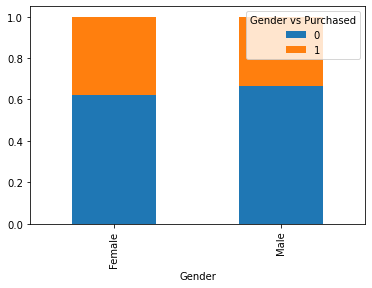

In [33]:
M2 = pd.crosstab(df.Gender, df.Purchased, normalize='index')
print(M2)
M2.plot.bar(figsize=(6,4),stacked=True)
plt.legend(title='Gender vs Purchased', loc='upper right')
plt.show()

(3, 3)


<AxesSubplot:>

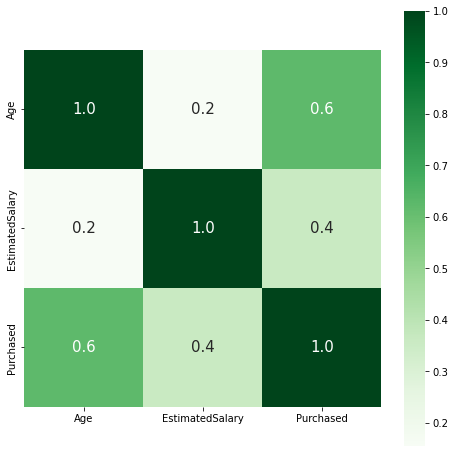

In [34]:
corr = df.corr()
print(corr.shape)
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

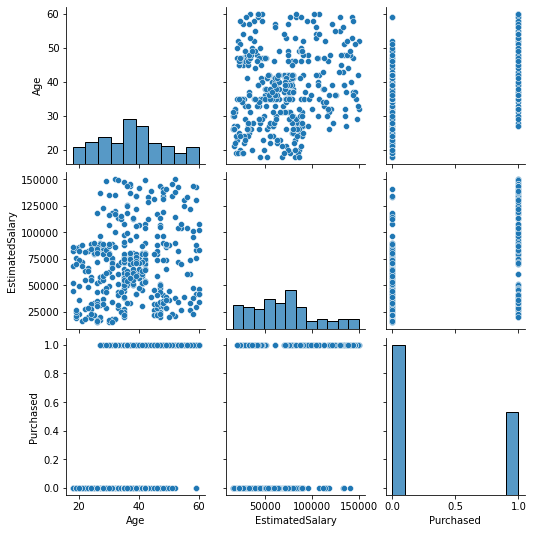

In [16]:
sns.pairplot(df)

**Get Input Variable into X and Outcome variable into Y**

In [17]:
X = df.drop(['Gender','Purchased'],axis=1)
Y = df['Purchased']
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


**Split the data into Train set and Test set**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print("Training and testing split was successful.")

Training and testing split was successful.


**Build the model**

In [19]:
from sklearn.linear_model import LogisticRegression
obj = LogisticRegression()
obj.fit(X_train,y_train)
print("Training accuracy:", obj.score(X_train,y_train)*100)

Training accuracy: 64.0625


**Make predictions on test data**

In [20]:
y_predict= obj.predict(X_test)
print("Testing accuracy:", obj.score(X_test,y_test)*100)

Testing accuracy: 65.0


**Normalize the data using Min Max Normalization or any other technique**

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [22]:
X=df[['Age','EstimatedSalary']]
X_scaled= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state = 42)
print("Training and testing split was successful.")

Training and testing split was successful.


In [23]:
model= LogisticRegression()
model.fit(X_train,y_train)
y_predict= model.predict(X_test)
print("Training accuracy:", model.score(X_train,y_train)*100)
print("Testing accuracy:", model.score(X_test,y_test)*100)

Training accuracy: 80.9375
Testing accuracy: 87.5


In [24]:
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_test,y_predict)*100
print(Acc)

87.5


In [25]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predict)
print(cm)

[[51  1]
 [ 9 19]]


In [26]:
df.shape

(400, 4)

In [27]:
from sklearn.metrics import precision_recall_fscore_support
prf= precision_recall_fscore_support(y_test,y_predict)
print('precision:',prf[0])
print('Recall:',prf[1])
print('fscore:',prf[2])
print('support:',prf[3])

precision: [0.85 0.95]
Recall: [0.98076923 0.67857143]
fscore: [0.91071429 0.79166667]
support: [52 28]


In [28]:
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80

